In [ ]:
knitr::opts_chunk$set(echo = TRUE)

# Libraries

In [1]:
library(Seurat)
library(reshape2)
library(tidyverse)
library(ggplot2)
library(ggsignif)
library(dplyr)
library(viridis)

Warning message:
“package ‘Seurat’ was built under R version 4.0.3”
Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggsignif’ was built under R version 4.0.3”
Loading required package

# B cell subclustering

Use pbmc object for subclustering - these subclustering steps are optional to reproduce the B cell analysis, as the fully processed B cell dataset is provided below. To run the following pre-processing steps, please download the pbmc dataset (Ramaswamy2021_MIS-C_10x_PBMC)

In [2]:
#misc.pbmc <- readRDS("misc_pbmc_final_upload.rds") 

Subcluster B-cell PBMC clusters

In [3]:
#b_clusters <- WhichCells(misc.pbmc, idents = c(5,10,18,22)) #Naive, mem, doublets, plasma cells
#misc.bcell.obj <- subset(misc.pbmc, cells = b_clusters)

#misc.bcell.list <-SplitObject(misc.bcell.obj, split.by = "orig.ident")

#sub_list <- c()

#for(i in 1:length(misc.bcell.list)){
#  object <- misc.bcell.list[[i]]
#  object@assays$integrated <- NULL
#  DefaultAssay(object) <- "RNA"
#  sub_list[[i]] <- object
#}

#names(sub_list) <- names(misc.bcell.list)

#sub_list[[7]] <- NULL



#for (i in 1:length(sub_list)) {
#  sub_list[[i]] <- FindVariableFeatures(sub_list[[i]],
#                                               selection.method = "vst",
#                                               nfeatures = 2000, verbose = FALSE)
#}



#misc.anchors <- FindIntegrationAnchors(object.list = sub_list, dims = 1:15, reference = c(9,13,22)) # (MIS-C, A.HD, C.HD)
#misc.int <- IntegrateData(anchorset = misc.anchors, dims = 1:15)

#misc.int <- ScaleData(misc.int, verbose = FALSE)
#misc.int <- RunPCA(misc.int, npcs = 30, verbose = FALSE)
#plot1 <- ElbowPlot(misc.int)
#misc.cluster <- misc.int #save a copy with PCA done for UMAP and clustering later

#misc.int <- RunUMAP(misc.int, reduction = "pca", dims = 1:15) #only run the first time
#plot2 <- DimPlot(misc.int, reduction = "umap", group.by = "orig.ident") #only run the first time
#plot2


## Find neighbors and clusters (louvain) based on PCA, and then run umap

#misc.cluster <- FindNeighbors(misc.cluster, dims = 1:15)
#misc.cluster <- FindClusters(misc.cluster, resolution = 0.3, random.seed= 10)


#colors <- c("#5A5156", "#325A9B", "#F6222E", "#FE00FA", "#16FF32", "#3283FE",
#          "#B10DA1", "#B00068", "#1CFFCE", "#90AD1C", "#2ED9FF", "#E4E1E3")


#misc.cluster <- RunUMAP(misc.cluster, dims = 1:15) #default is reduction = pca
#plot7 <- DimPlot(misc.cluster, reduction = "umap",
#                 pt.size =0.5, label = TRUE)

#bcell_markers <- FindAllMarkers(misc.cluster, only.pos = TRUE, # for annotation
#                                min.pct = 0.25, logfc.threshold = 0.25, assay = "RNA")

#bcell_markers


## Feature plotting for annotation

#plot9 <- FeaturePlot(object = misc.cluster,
#                   features = "rna_JCHAIN",
#                     min.cutoff = 0,
#                     #                     max.cutoff = 6,
#                     pt.size = 0.8,
#                     order = TRUE) + theme_classic(base_size = 25)+
#  theme(axis.text = element_text(size = 35),
#        legend.text = element_text(size = 20),
#        plot.title = element_text(size = 45, face= "italic", hjust = 0.5)) +
#  ggtitle("JCHAIN")

#plot9


## Sample composition

#cluster_prop <- table(Idents(misc.cluster), misc.cluster$orig.ident) # this goes into cell type proportion grid

#head(cluster_prop)
## original idents can be found as "sequencing ids" in supplementary sample info table



## Single R

#library(SingleR)
#library(ensembldb)
#test <- GetAssayData(misc.cluster)
#monaco <- MonacoImmuneData(ensembl=FALSE)
#annot <- SingleR(test = test, ref = monaco, labels = monaco$label.fine)
#misc.cluster[["SingleR.labels"]] <- annot$labels

#plot8 <- DimPlot(misc.cluster, reduction = "umap",
#                 cols=DiscretePalette(32, palette='polychrome'),
#                 pt.size =0.5,
#                 group.by = "SingleR.labels")

#plot8


# Load in B cell object and plot UMAP

Annotations and metadata updated in the below object

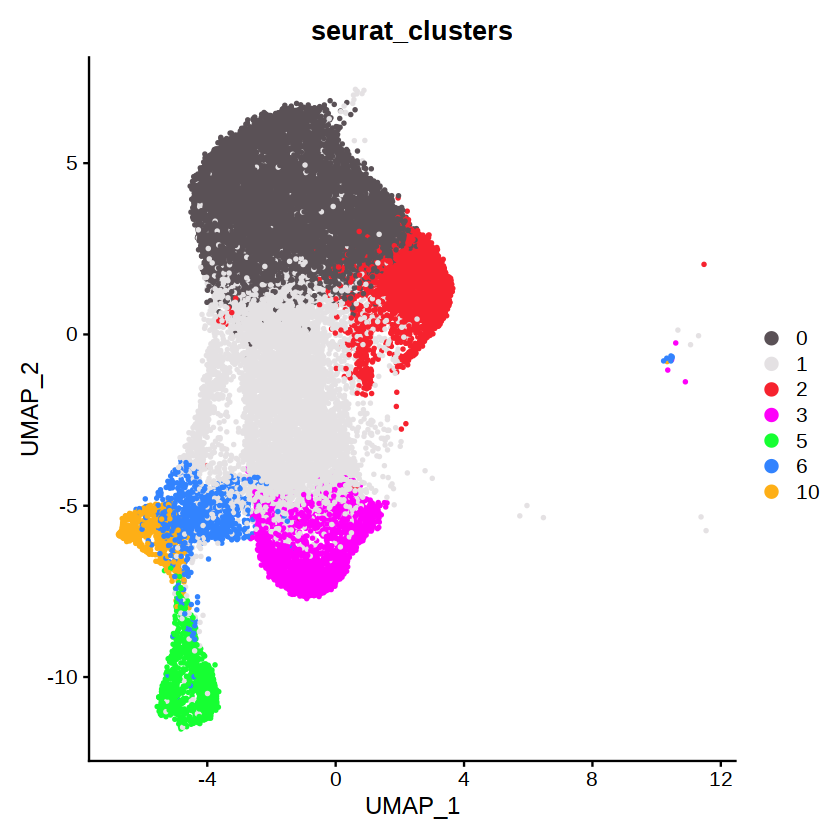

In [4]:
misc.bcell <- readRDS("/fastgenomics/data/dataset_0001/misc_bcell_final_upload.rds") 

plot8 <- DimPlot(misc.bcell, reduction = "umap",
                 cols=DiscretePalette(32, palette='polychrome'),
                 pt.size =0.5,
                 group.by = "seurat_clusters")

plot8

# Dot Plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



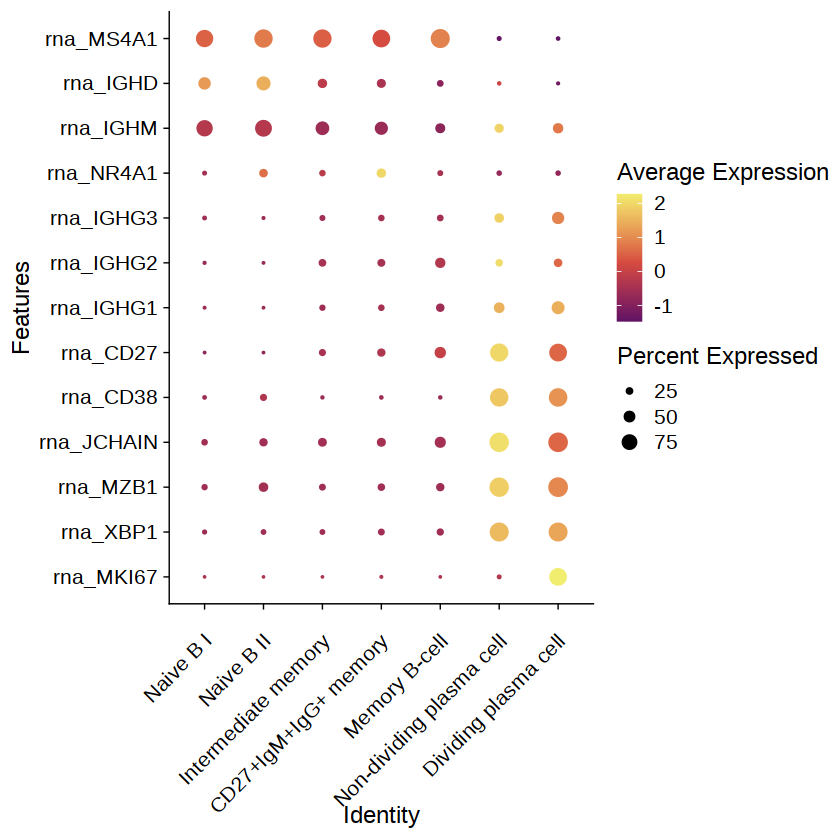

In [5]:
level.order <- c("Naive B I", "Naive B II", "Intermediate memory", "CD27+IgM+IgG+ memory",
                 "Memory B-cell", "Non-dividing plasma cell", "Dividing plasma cell")

misc.bcell$annotation_bcell <- factor(misc.bcell$annotation_bcell, levels = level.order )

features.bcell <- c("rna_MS4A1", "rna_IGHD", "rna_IGHM", "rna_NR4A1", 
                    "rna_IGHG3", "rna_IGHG2", "rna_IGHG1",  "rna_CD27",
                    "rna_CD38", "rna_JCHAIN", "rna_MZB1", "rna_XBP1", "rna_MKI67")

Idents(misc.bcell) <- "annotation_bcell"

inferno_mod <- inferno(20)[3:20]

dot <- DotPlot(misc.bcell, features = rev(features.bcell),  
               assay = "RNA", dot.scale = 4.5)+ 
  scale_color_gradient2(low = inferno_mod[3], mid = "#D64B40FF", high = "#F1ED6FFF", midpoint = 0.25) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 12),
        axis.line = element_line(size = 0.3), axis.ticks = element_line(size = 0.3)) + 
  coord_flip()

dot

In [8]:
cluster_prop <- table(Idents(misc.bcell), misc.bcell$orig.ident)

[1] 7

In [77]:
samples <- cluster_prop

samples <- rbind(samples, colSums(samples[1:nrow(cluster_prop),]))

samples_prop <- samples


In [78]:
for(j in 1:ncol(samples)){ 
  for(i in 1:nrow(samples)){
    samples_prop[i,j] <- samples[i,j]/samples[nrow(samples),j]
  }
}


In [79]:
donor.names <- colnames(samples_prop)[1:ncol(samples_prop)]
samples_prop <- samples_prop[1:7,]
samples_plot <- melt(samples_prop, measure.vars = donor.names, id.vars = rownames(samples_prop))

In [80]:
names(samples_plot) <- c("seurat_clusters", "donor", "value")
samples_plot$seurat_clusters <- as.factor(samples_plot$seurat_clusters)

samples_plot[samples_plot$donor %in% c("C27", "C32", "C33", "C39", "HA5876", "HA5877",
                                          "HA5894", "HA5952", "HA5953", "HA5957", "HD_32M", 
                                          "HD_35F", "HD_36M"), 'condition'] <- 'A.HD'

samples_plot[samples_plot$donor %in% c("NS0A", "NS1A", "TS2A","TS3A"), 'condition'] <- 'COVID19-A'

samples_plot[samples_plot$donor %in% c("NS0B", "NS1B", "TP8B", "TP9B", 
                                          "TS2B", "TS3B"), 'condition'] <- 'COVID19-B'

samples_plot[samples_plot$donor %in% c("Y124-1", "Y125-1", "Y127-1", "Y111-1", 
                                          "Y113-1", "Y117-1", "Y129-1"), 'condition'] <- 'MIS-C'

samples_plot[samples_plot$donor %in% c("NC-13F", "Y28-2", "Y28-4", 
                                          "Y29-2", "Y54-4", "Y70-4"), 'condition'] <- 'C.HD'

samples_plot[samples_plot$donor %in% c("Y117-R", "Y124-R"), 'condition'] <- 'MIS-C-R'

In [81]:
samples_plot_severe <- samples_plot %>% filter(donor %in% c("Y111-1", "Y113-1", "Y117-1", "Y127-1","Y129-1"))
head(samples_plot_severe)

,seurat_clusters,donor,value,condition
,<fct>,<fct>,<dbl>,<chr>
1,Naive B I,Y111-1,0.573787410,MIS-C
2,Naive B II,Y111-1,0.087719298,MIS-C
3,Intermediate memory,Y111-1,0.138286894,MIS-C
4,CD27+IgM+IgG+ memory,Y111-1,0.001031992,MIS-C
5,Memory B-cell,Y111-1,0.030959752,MIS-C
6,Non-dividing plasma cell,Y111-1,0.051599587,MIS-C


In [82]:
samples_plot[,5] <- samples_plot[,3]*100 #change to 6 when we have annotations
samples_plot_severe[,5] <- samples_plot_severe[,3]*100 #change to 6 when we have annotations
names(samples_plot)[5] <- "percentage"
names(samples_plot_severe)[5] <- "percentage"
head(samples_plot)

,seurat_clusters,donor,value,condition,percentage
,<fct>,<fct>,<dbl>,<chr>,<dbl>
1,Naive B I,C27,0.34774436,A.HD,34.774436
2,Naive B II,C27,0.06203008,A.HD,6.203008
3,Intermediate memory,C27,0.33270677,A.HD,33.270677
4,CD27+IgM+IgG+ memory,C27,0.18233083,A.HD,18.233083
5,Memory B-cell,C27,0.06203008,A.HD,6.203008
6,Non-dividing plasma cell,C27,0.01315789,A.HD,1.315789


In [83]:
samples_plot <- samples_plot %>% filter(condition %in% c("C.HD", "MIS-C", "MIS-C-R"))
samples_plot_severe <- samples_plot_severe %>% filter(condition %in% c("C.HD", "MIS-C", "MIS-C-R"))

In [102]:
condition_pvals <- list()

pvals <- list()

cluster_num <- annotation_order

level_order <- c("C.HD", "MIS-C", "MIS-C-R")

for(j in 1:length(level_order)){
  for(i in 1:length(cluster_num)){
    cluster <- samples_plot %>% filter(seurat_clusters == cluster_num[i] & condition == level_order[j])
    pvals[[i]] <- cluster$percentage
  }
  names(pvals) <- annotation_order
  condition_pvals[[j]] <- pvals
  names(condition_pvals)[j] <- level_order[j]
}


# For CHD/MISC comparison 

chd_misc_pvals <- c()
annot <- names(pvals)

for(i in 1:length(annot)){
  w.test <- wilcox.test(x = condition_pvals[['C.HD']][[annot[i]]],
                        y = condition_pvals[['MIS-C']][[annot[i]]],
                        alternative = c("two.sided"), correct = FALSE)
  chd_misc_pvals[i] <- w.test$p.value
}

chd_misc_df <- data.frame(pval=chd_misc_pvals, facet_name=names(pvals))

names(chd_misc_df)[2] <- "seurat_clusters"

#write.csv(chd_misc_df2, file = "wilcoxon_pbmc_compositions.csv")

# 
chd_misc_df$comp.a <- 'C.HD'
chd_misc_df$comp.b <- 'MIS-C'
chd_misc_df$ypos <- c(63,18,42,12,16,13,21)
chd_misc_df$seurat_clusters <- as.character(chd_misc_df$seurat_clusters)
chd_misc_df$seurat_clusters <- factor(chd_misc_df$seurat_clusters, level = annotation_order)

Warning message in wilcox.test.default(x = condition_pvals[["C.HD"]][[annot[i]]], :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = condition_pvals[["C.HD"]][[annot[i]]], :
“cannot compute exact p-value with ties”


In [98]:
head(chd_misc_df)

,pval,annotation_bcell,comp.a,comp.b,ypos
,<chr>,<fct>,<chr>,<chr>,<dbl>
1,0.02,Naive B I,C.HD,MIS-C,63
2,0.02,Memory B-cell,C.HD,MIS-C,12
3,0.03,Dividing plasma cell,C.HD,MIS-C,13


Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



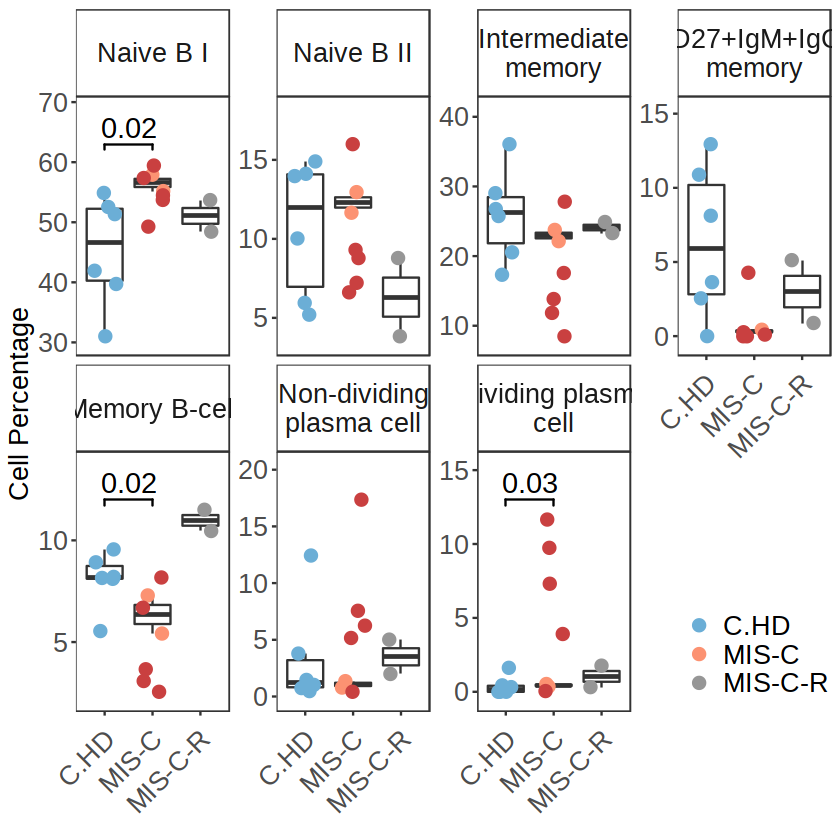

In [103]:
for(i in 1:nrow(chd_misc_df)){
  pval <- chd_misc_df[i,1]
  chd_misc_df[i,1] <- format.pval(as.double(as.character(pval)), digits=1, eps=0.001)
}

chd_misc_df <- chd_misc_df %>% filter(pval < 0.051)

# Remove extra points from samples_plot for plotting
samples_plot2 <- samples_plot %>% filter(!(donor %in% c("Y111-1", "Y113-1", "Y117-1", "Y127-1","Y129-1")))


cols <- c("#6baed6", "#FC9272", "#969696")


plot1 <- ggplot(samples_plot2, aes(x = factor(condition, level = level_order), y = percentage)) + 
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(data=samples_plot2, aes(colour = factor(condition, level = level_order)), size = 3, width = 0.25) + 
  geom_jitter(data=samples_plot_severe, aes(group = factor(condition, level = level_order)), colour ="#c94040",  size = 3, width = 0.25) +
  geom_signif(data=chd_misc_df, aes(xmin=comp.a, xmax=comp.b, annotations=pval, y_position=ypos),
              textsize = 6, vjust=-0.2, manual=TRUE) + ylim(c(NA, 5)) +
  facet_wrap(~seurat_clusters, nrow=2, scales='free_y', labeller = label_wrap_gen(16)) +
  scale_color_manual(values = cols) +theme_bw() +
  scale_y_continuous(expand = expansion(mult=c(0.1, 0.25))) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size =10),
        legend.text = element_text(size=16),
        legend.title = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        strip.text = element_text(size = 16, margin =margin()),
        strip.text.x = element_text(margin = margin( b = 10, t = 10)),
        strip.background = element_rect(fill="white"),
        legend.position = c(0.9,0.1)) +
  ylab("Cell Percentage") +
  xlab("") 
plot1